In [1]:
#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import pandas as pd
import random
import itertools
import seaborn as sns

sns.set(style = 'darkgrid')
% matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
bc = pd.read_csv('C:\\Users\\Travis Park\\Downloads\\BreastCancer.csv')

In [4]:
bc.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [5]:
bcs = pd.DataFrame(preprocessing.scale(bc.ix[:,2:32]))
bcs.columns = list(bc.ix[:,2:32].columns)
bcs['diagnosis'] = bc['diagnosis']

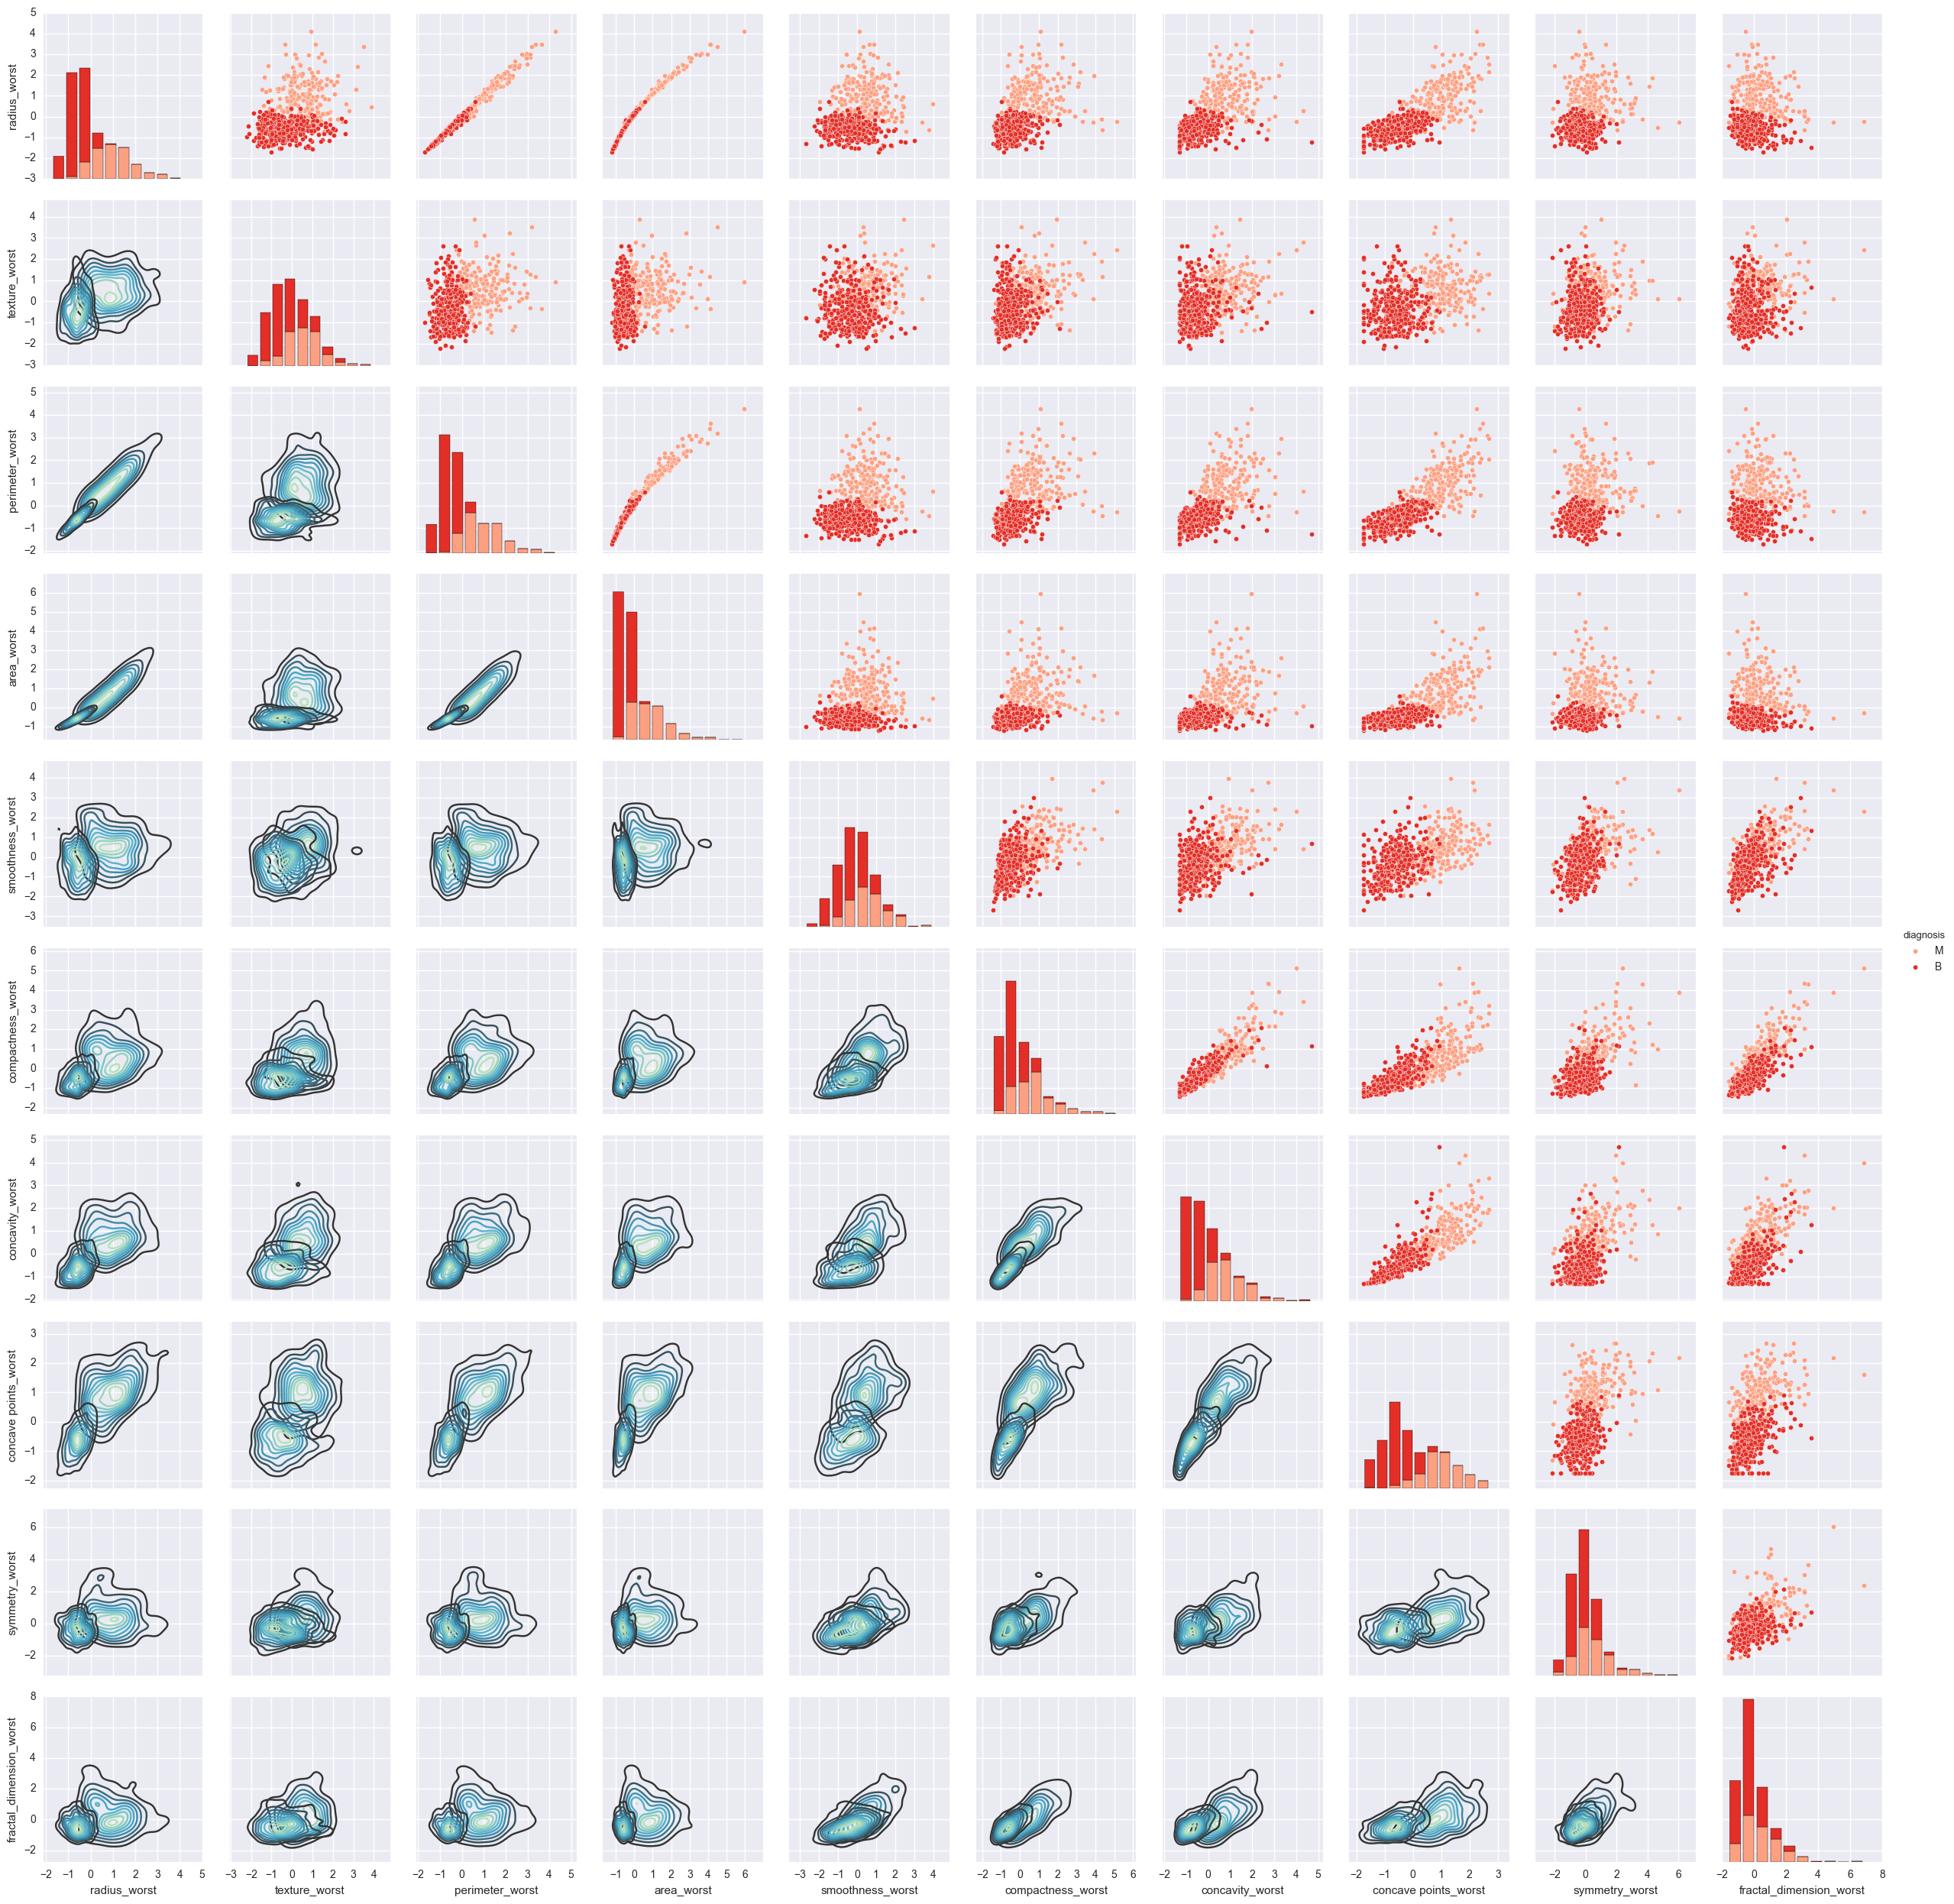

In [6]:
from pandas.tools.plotting import scatter_matrix
p = sns.PairGrid(bcs.ix[:,20:32], hue = 'diagnosis', palette = 'Reds')
p.map_upper(plt.scatter, s = 20, edgecolor = 'w')
p.map_diag(plt.hist)
p.map_lower(sns.kdeplot, cmap = 'GnBu_d')
p.add_legend()

p.figsize = (30,30)

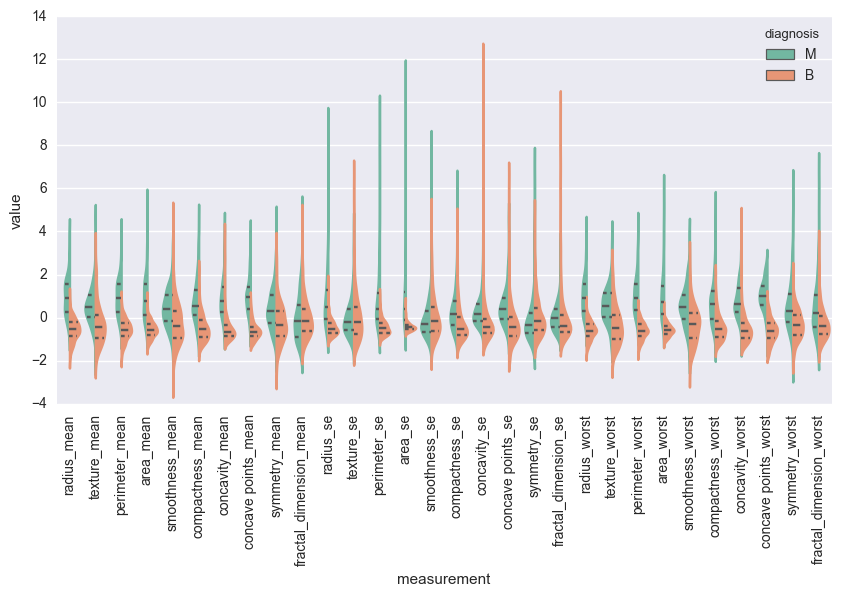

In [7]:
mbc = pd.melt(bcs, "diagnosis", var_name="measurement")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax=ax, x="measurement", y="value", hue="diagnosis", split = True, data=mbc, inner = 'quartile', palette = 'Set2');
p.set_xticklabels(rotation = 90, labels = list(bcs.columns));

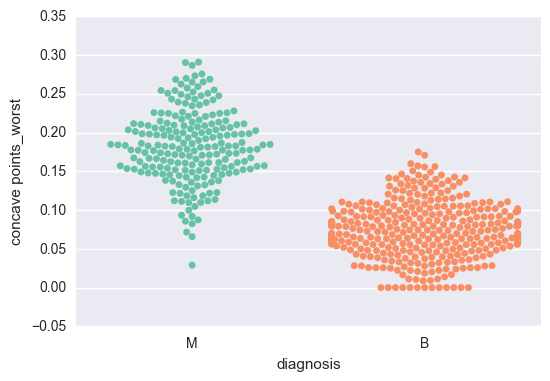

In [8]:
sns.swarmplot(x = 'diagnosis', y = 'concave points_worst',palette = 'Set2', data = bc);

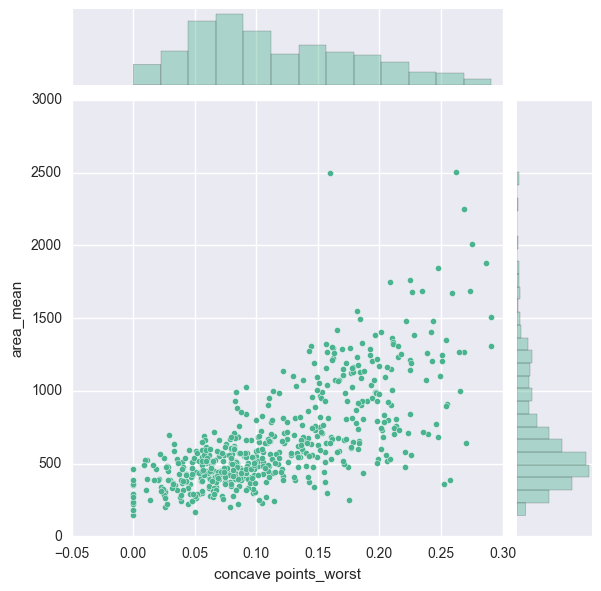

In [9]:
sns.jointplot(x = bc['concave points_worst'], y = bc['area_mean'], stat_func=None, color="#4CB391", edgecolor = 'w', size = 6)

In [10]:
X = bcs.ix[:,0:30]

y = bcs['diagnosis']
class_names = list(y.unique())

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
svc = SVC(kernel = 'linear',C=.1, gamma=10, probability = True)
svc.fit(X,y)
y_pred = svc.fit(X_train, y_train).predict(X_test)
t = pd.DataFrame(svc.predict_proba(X_test))
svc.score(X_train,y_train), svc.score(X_test, y_test)

(0.98425196850393704, 0.97872340425531912)

In [13]:
mtrx = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision = 2)

Confusion matrix, without normalization
[[119   2]
 [  2  65]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.03  0.97]]


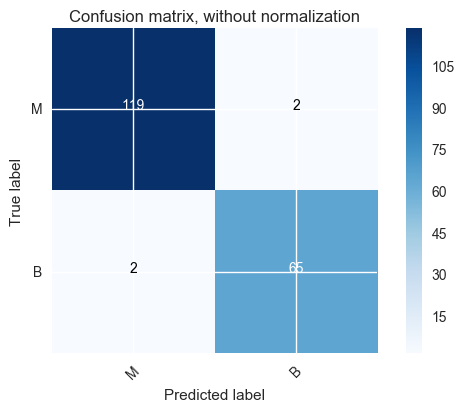

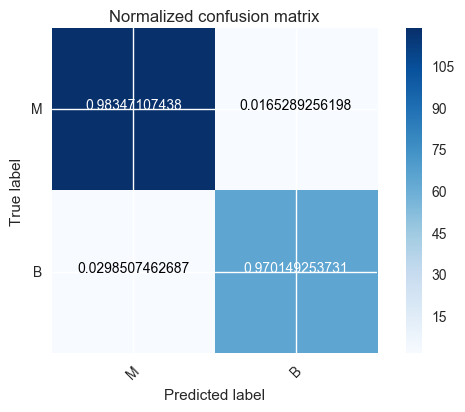

In [14]:
plt.figure()
plot_confusion_matrix(mtrx,classes=class_names,title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(mtrx, classes=class_names, normalize = True, title='Normalized confusion matrix')

plt.show()